In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#     Import customer data 

In [2]:
df_ct = pd.read_csv('C:/Users/aman1/OneDrive/PythonforDataScience/Project/retail_customer_analysis/Customer.csv')

In [3]:
#import product information data. 
df_pro = pd.read_csv('C:/Users/aman1/OneDrive/PythonforDataScience/Project/retail_customer_analysis/prod_cat_info.csv')

In [4]:
#import transaction data
df_trs = pd.read_csv('C:/Users/aman1/OneDrive/PythonforDataScience/Project/retail_customer_analysis/Transactions.csv')

In [5]:
#Understanding Data shape ,size and info.

In [6]:
df_pro.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
df_ct.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [8]:
df_trs.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
df_trs.shape

(23053, 10)

In [10]:
df_pro.shape

(23, 4)

In [11]:
df_ct.shape

(5647, 4)

In [12]:
df_trs.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

# Merging Data frames

# Before merging it is required need to rename prod_subcat_code column to 'prod_sub_cat_code' and match column names for easy join join on it.

In [13]:
#data sets that needs to be merged
print(df_trs.head(5));
print("************************************");
print(df_pro.head(5))

   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   

   Rate      Tax  total_amt Store_type  
0  -772  405.300  -4265.300     e-Shop  
1 -1497  785.925  -8270.925     e-Shop  
2  -791  166.110  -1748.110   TeleShop  
3 -1363  429.345  -4518.345     e-Shop  
4  -791  166.110  -1748.110   TeleShop  
************************************
   prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women
2              1  Clothing                  3        Kids
3   

In [14]:
#df_pro['prod_cat_code'].unique()
df_pro['prod_sub_cat_code'].unique()

array([ 4,  1,  3,  5,  8,  9, 10,  7, 12, 11,  6,  2], dtype=int64)

In [15]:
df_trs.rename(columns={'prod_subcat_code':'prod_sub_cat_code'},inplace=True)

In [16]:
df_com = pd.merge(df_trs,df_pro,how ='outer', on =['prod_sub_cat_code'])

In [17]:
df_com.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code_x', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat_code_y', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [18]:
# its giving prod_cat_code as x and y therefore we need to split these two code from prod data 
cols_pro_cat = ['prod_cat_code','prod_cat']
cols_prosub_cat= ['prod_sub_cat_code','prod_subcat']

df_cat_cod =df_pro[cols_pro_cat]
df_subcat_cod=df_pro[cols_prosub_cat]

In [19]:
df_subcat_cod.head(4)

,prod_sub_cat_code,prod_subcat
0,4,Mens
1,1,Women
2,3,Kids
3,1,Mens


In [20]:
df_cat_cod.head(4)


,prod_cat_code,prod_cat
0,1,Clothing
1,1,Clothing
2,1,Clothing
3,2,Footwear


In [21]:
#we can join these two columns separtely to get better output and avoid loss of data
#as many prod sub category code are missing.
df_merged2= pd.merge(df_trs,df_cat_cod,how ='outer',on =['prod_cat_code'])

In [22]:
df_merged3 = pd.merge(df_trs,df_subcat_cod,how='outer', on =['prod_sub_cat_code'])

In [23]:
df_merged2.head(4)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
3,79792372943,275108,22-02-2014,3,1,-3,-908,286.02,-3010.02,MBR,Clothing


In [24]:
df_merged3.head(4)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women


In [25]:
#df_merged3 is collab properly now ,
# now to check for any error or null value in out merged data

In [26]:
#third data to merge here is df_com (customer data) 
df_ct.head(4)


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0


In [27]:
df_ct.rename(columns={'customer_Id':'cust_id'},inplace = True)

In [28]:
df_ct.columns

Index(['cust_id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [29]:
df_merged3.shape

(57166, 11)

In [30]:
df_merged_final = pd.merge(df_trs,df_ct,how='outer', on =['cust_id'])

In [31]:
df_merged_final.shape

(23194, 13)

In [32]:
df_merged_final.isna().sum()

transaction_id       141
cust_id                0
tran_date            141
prod_sub_cat_code    141
prod_cat_code        141
Qty                  141
Rate                 141
Tax                  141
total_amt            141
Store_type           141
DOB                    0
Gender                 9
city_code              8
dtype: int64

In [33]:
# there is no data avalaible for these cusomer_id(141 rows), therefore we can drop this
col_ar =list(df_merged_final.columns)
df_merged_final[df_merged_final['transaction_id'].isna()]
df_merged_final.dropna(inplace=True)

In [34]:
df_merged_final.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,8.071219e+10,270351,28-02-2014,1.0,1.0,-5.0,-772.0,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,8.071219e+10,270351,20-02-2014,1.0,1.0,5.0,772.0,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,3.695744e+10,270351,16-09-2013,3.0,2.0,3.0,361.0,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,1.223628e+10,270351,18-03-2013,8.0,3.0,3.0,1030.0,324.450,3414.450,e-Shop,26-09-1981,M,5.0
4,1.318156e+10,270351,13-12-2011,6.0,5.0,1.0,1048.0,110.040,1158.040,e-Shop,26-09-1981,M,5.0


In [35]:
df_merged_final.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
DOB                  0
Gender               0
city_code            0
dtype: int64

In [36]:
print(df_merged_final.loc[df_merged_final['Gender']=='M'])
#df_merged_final.loc[df_merged_final['Gender']=='M'].count()

       transaction_id  cust_id   tran_date  prod_sub_cat_code  prod_cat_code  \
0        8.071219e+10   270351  28-02-2014                1.0            1.0   
1        8.071219e+10   270351  20-02-2014                1.0            1.0   
2        3.695744e+10   270351  16-09-2013                3.0            2.0   
3        1.223628e+10   270351  18-03-2013                8.0            3.0   
4        1.318156e+10   270351  13-12-2011                6.0            5.0   
...               ...      ...         ...                ...            ...   
23039    6.582324e+10   272650  16-02-2011               11.0            6.0   
23047    1.293389e+10   272706  31-01-2011                1.0            4.0   
23048    1.629319e+10   274931  31-01-2011                8.0            3.0   
23049    7.016396e+10   267902  30-01-2011               10.0            5.0   
23050    2.041714e+10   269556  29-01-2011               10.0            6.0   

       Qty    Rate      Tax  total_amt 

In [37]:
#We are left with 23036 values of rows for the final data set
df_merged_final.shape

(23036, 13)

In [38]:
df_merged3.isnull().any()

transaction_id       False
cust_id              False
tran_date            False
prod_sub_cat_code    False
prod_cat_code        False
Qty                  False
Rate                 False
Tax                  False
total_amt            False
Store_type           False
prod_subcat          False
dtype: bool

In [39]:
df_merged3.describe()

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,5.716600e+04,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000
mean,5.017556e+10,271015.375101,5.613949,3.462425,2.429766,635.022653,248.967409,2102.084532
std,2.896442e+10,2426.954106,3.701183,1.710811,2.273219,623.390431,187.344788,2516.597510
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.527880e+10,268931.000000,3.000000,2.000000,1.000000,312.000000,98.490000,764.660000
50%,5.019132e+10,270982.000000,4.000000,3.000000,3.000000,709.000000,199.342500,1759.160000
75%,7.551116e+10,273096.000000,10.000000,5.000000,4.000000,1109.000000,364.980000,3553.680000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


#exploring merge data for error values

In [40]:
# no null values in merged data
df_merged3.isnull().any()

transaction_id       False
cust_id              False
tran_date            False
prod_sub_cat_code    False
prod_cat_code        False
Qty                  False
Rate                 False
Tax                  False
total_amt            False
Store_type           False
prod_subcat          False
dtype: bool

In [41]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 0 to 57165
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     57166 non-null  int64  
 1   cust_id            57166 non-null  int64  
 2   tran_date          57166 non-null  object 
 3   prod_sub_cat_code  57166 non-null  int64  
 4   prod_cat_code_x    57166 non-null  int64  
 5   Qty                57166 non-null  int64  
 6   Rate               57166 non-null  int64  
 7   Tax                57166 non-null  float64
 8   total_amt          57166 non-null  float64
 9   Store_type         57166 non-null  object 
 10  prod_cat_code_y    57166 non-null  int64  
 11  prod_cat           57166 non-null  object 
 12  prod_subcat        57166 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 6.1+ MB


In [42]:

#df_merged3
#years_date = df_merged3['tran_date'].dt.year

In [43]:
#x =df_merged3['tran_date']
#year = datetime.strptime(x[2],'%d-%m-%Y').date()
#x[2]

In [44]:
y_trs =df_merged3['tran_date']

In [45]:
 c =len(y_trs)

In [46]:
ntr = y_trs.str.replace('/','-')

In [47]:
ntr.shape

(57166,)

In [48]:
y_trs[99]

'3/2/2014'

In [49]:
ntr[99]

'3-2-2014'

In [50]:
ntr[99]

'3-2-2014'

In [51]:
ntr2 =ntr
ln = len(ntr2)

In [52]:
ar = []
for i in range(ln):
    year = datetime.strptime(ntr2[i],('%d-%m-%Y'))
    ar.append(year)
    
    


In [53]:
ar[1].month

2

In [54]:
len(ar)

57166

In [55]:
ar[:2]

[datetime.datetime(2014, 2, 28, 0, 0), datetime.datetime(2014, 2, 28, 0, 0)]

In [56]:
df_merged3.shape

(57166, 11)

In [57]:
# adding date features to the data frame , 
#ths will be added to merged transaction data set to avoid loss of data after merging
#with customer data

# As motive of date features is to get at what time of year , month , week there were more transactions


In [58]:
ar_df = pd.DataFrame(ar)

In [59]:
ar_df.head(4)

,0
0,2014-02-28
1,2014-02-28
2,2014-02-28
3,2014-02-20


In [60]:
x_m = ar_df[0].dt.month
x_y =ar_df[0].dt.year


In [61]:
month = {1:'Janauary',
2:'February',
3:'March',
4:'April',
5:'May',
6:'June',
7:'July',
8:'August',
9:'September',
10:'October',
11:'November',
12:'December'}

In [62]:
month_words =[]
for i in x_m:
    month_words.append(month[i])

In [63]:
x_y

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
57161    2011
57162    2011
57163    2011
57164    2011
57165    2011
Name: 0, Length: 57166, dtype: int64

In [64]:
ar[i]

datetime.datetime(2014, 2, 28, 0, 0)

In [65]:
ar_day=[]
for i in range(len(ar)):
    ar_day.append(ar[i].weekday())
    


In [66]:
weekdays_d = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
#ar_day

In [67]:
day =[]
for i in ar_day:
    day.append(weekdays_d[i])

In [68]:
weekday_weekend2=[]
for i in range(len(ar_day)):
    if ar_day[i]<4:
        weekday_weekend2.append('Weekday')
    elif ar_day[i]>=4:
        weekday_weekend2.append('Weekend')

In [69]:
len(ar_day)

57166

In [70]:
x_mdf = pd.DataFrame()

In [71]:
df_merged3['Date_fm'] =ar

In [72]:
df_merged3['Month']=ar_df[0].dt.month

In [73]:
df_merged3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women,2014-02-28,2
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women,2014-02-20,2
4,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Mens,2014-02-20,2


In [74]:
df_merged3['Year']= x_y

In [75]:
df_merged3['Day'] =day

In [76]:
df_merged3['Weekend/Weekday'] =weekday_weekend2

In [77]:
x_wd = df_merged3['Weekend/Weekday'].value_counts()

In [78]:
x_wd

Weekday    32569
Weekend    24597
Name: Weekend/Weekday, dtype: int64

In [79]:
df_merged3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month,Year,Day,Weekend/Weekday
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women,2014-02-28,2,2014,Friday,Weekend
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women,2014-02-20,2,2014,Thursday,Weekday
4,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Mens,2014-02-20,2,2014,Thursday,Weekday


In [80]:
x_wd.values

array([32569, 24597], dtype=int64)

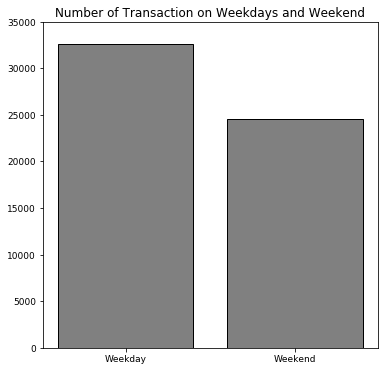

In [81]:
# visualising how many transaction are on weekend and how many on weekday.
df_wd = df_merged3['Weekend/Weekday']
fig, ax = plt.subplots(figsize =(6,6))
plt.style.use('classic')
plt.title('Number of Transaction on Weekdays and Weekend',fontsize=12)
ax.bar(x_wd.index,x_wd.values, color='gray')
ax.tick_params(labelsize=9)
plt.show()

In [82]:
df_merged3.head(2)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month,Year,Day,Weekend/Weekday
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Women,2014-02-28,2,2014,Friday,Weekend
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend


In [83]:
#Its important to know the net sale that can be expected on 
#perticular days so that company can arrange required staff and stock
df_weekdays = df_merged3.groupby('Day').mean().sort_values('total_amt',ascending=False)

In [84]:
df_weekdays

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Month,Year
Day,,,,,,,,,,
Wednesday,5.093371e+10,270998.002072,5.617335,3.440083,2.462514,646.305498,248.646208,2151.386506,6.279044,2012.140315
Saturday,5.014782e+10,271076.603959,5.640314,3.469622,2.434014,643.482321,253.307271,2129.931524,6.514940,2012.131350
Thursday,5.053980e+10,271031.564171,5.609774,3.491835,2.408854,638.431475,243.134682,2095.330219,6.425305,2012.124108
Sunday,4.983530e+10,270951.567699,5.563934,3.473953,2.444809,637.042380,249.997311,2092.339439,6.576078,2012.085489
Tuesday,5.046760e+10,271026.735683,5.593445,3.437229,2.430674,613.885962,253.071429,2090.359046,6.404329,2012.088683
Monday,5.029557e+10,271033.123659,5.572872,3.445221,2.448340,628.751685,246.818393,2081.873775,6.570876,2012.105690
Friday,4.903172e+10,270992.356182,5.698199,3.477911,2.380552,636.923169,247.953744,2073.845296,6.436975,2012.130732


In [85]:
sum_sales = df_weekdays['total_amt'].sum()
df_weekdays['sales_ratio'] =df_weekdays['total_amt']/sum_sales

In [86]:
df_weekdays

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Month,Year,sales_ratio
Day,,,,,,,,,,,
Wednesday,5.093371e+10,270998.002072,5.617335,3.440083,2.462514,646.305498,248.646208,2151.386506,6.279044,2012.140315,0.146203
Saturday,5.014782e+10,271076.603959,5.640314,3.469622,2.434014,643.482321,253.307271,2129.931524,6.514940,2012.131350,0.144745
Thursday,5.053980e+10,271031.564171,5.609774,3.491835,2.408854,638.431475,243.134682,2095.330219,6.425305,2012.124108,0.142394
Sunday,4.983530e+10,270951.567699,5.563934,3.473953,2.444809,637.042380,249.997311,2092.339439,6.576078,2012.085489,0.142190
Tuesday,5.046760e+10,271026.735683,5.593445,3.437229,2.430674,613.885962,253.071429,2090.359046,6.404329,2012.088683,0.142056
Monday,5.029557e+10,271033.123659,5.572872,3.445221,2.448340,628.751685,246.818393,2081.873775,6.570876,2012.105690,0.141479
Friday,4.903172e+10,270992.356182,5.698199,3.477911,2.380552,636.923169,247.953744,2073.845296,6.436975,2012.130732,0.140933


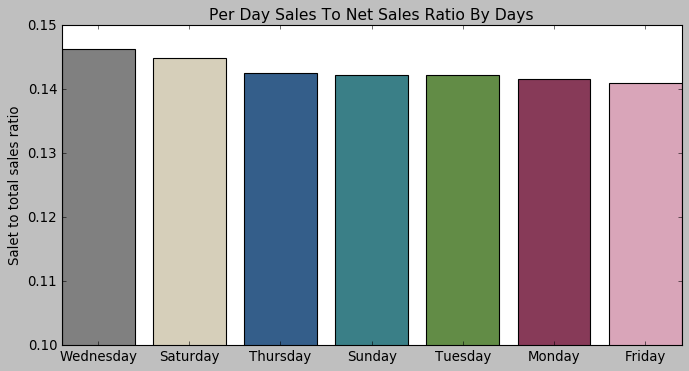

In [87]:
fig , ax = plt.subplots(figsize=(10,5))
ax.bar(df_weekdays.index,df_weekdays['sales_ratio'],color=['gray','#d6cfba','#345e8a','#3a7f87', '#628c46','#873a58','#d9a5b9'])
ax.set_title('Per Day Sales To Net Sales Ratio By Days',fontsize=14)
ax.tick_params(labelsize=12)
ax.set_ylabel('Salet to total sales ratio')
plt.style.use('classic')
ax.set_ylim(0.10,0.15)
plt.show()

In [88]:
# Sales to net sales ratio is not varying to much depneding upon day, 
#although its slighlty higher on wednesday ,Saturday, Thursday

In [89]:
df_merged_final.head(4)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,8.071219e+10,270351,28-02-2014,1.0,1.0,-5.0,-772.0,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,8.071219e+10,270351,20-02-2014,1.0,1.0,5.0,772.0,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,3.695744e+10,270351,16-09-2013,3.0,2.0,3.0,361.0,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,1.223628e+10,270351,18-03-2013,8.0,3.0,3.0,1030.0,324.450,3414.450,e-Shop,26-09-1981,M,5.0


In [90]:
df_merged3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month,Year,Day,Weekend/Weekday
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women,2014-02-28,2,2014,Friday,Weekend
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women,2014-02-20,2,2014,Thursday,Weekday
4,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Mens,2014-02-20,2,2014,Thursday,Weekday


In [91]:
df_merged2.head(5)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
3,79792372943,275108,22-02-2014,3,1,-3,-908,286.02,-3010.02,MBR,Clothing
4,79792372943,275108,22-02-2014,3,1,-3,-908,286.02,-3010.02,MBR,Clothing


In [92]:
df_merged2.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing
3,79792372943,275108,22-02-2014,3,1,-3,-908,286.02,-3010.02,MBR,Clothing
4,79792372943,275108,22-02-2014,3,1,-3,-908,286.02,-3010.02,MBR,Clothing


In [93]:
df_pc_m = df_merged2.groupby('prod_cat').mean()

In [94]:
df_pc_m2 = df_merged2.groupby('prod_cat').count()

In [95]:
df_pc_m2

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
prod_cat,,,,,,,,,,
Bags,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996
Books,36414,36414,36414,36414,36414,36414,36414,36414,36414,36414
Clothing,8880,8880,8880,8880,8880,8880,8880,8880,8880,8880
Electronics,24490,24490,24490,24490,24490,24490,24490,24490,24490,24490
Footwear,8997,8997,8997,8997,8997,8997,8997,8997,8997,8997
Home and kitchen,16516,16516,16516,16516,16516,16516,16516,16516,16516,16516


In [96]:
df_pc_m

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
prod_cat,,,,,,,,
Bags,4.978819e+10,270882.603604,2.493994,4.0,2.356356,626.835335,249.320345,2064.418739
Books,5.004895e+10,271038.833086,8.132641,5.0,2.417037,637.731916,249.681522,2112.818263
Clothing,5.015587e+10,271045.365878,2.647635,1.0,2.423649,635.129392,253.538889,2111.870774
Electronics,5.015469e+10,271047.731931,7.161086,3.0,2.512862,652.110249,251.514852,2189.151416
Footwear,5.041503e+10,271021.814605,2.708236,2.0,2.425475,630.194732,244.906320,2073.949408
Home and kitchen,4.984410e+10,271016.155486,8.811092,6.0,2.407605,625.683216,242.721397,2043.834655


In [97]:
df_pc_m3 = df_merged2.groupby('prod_cat').sum()

In [98]:
df_pc_m3

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
prod_cat,,,,,,,,
Bags,198953609834268,1082446884,9966,15984,9416,2504834,996284.100,8.249417e+06
Books,1822482551293728,9869608068,296142,182070,88014,23222370,9091902.960,7.693616e+07
Clothing,445384164469101,2406882849,23511,8880,21522,5639949,2251425.330,1.875341e+07
Electronics,1228288454399785,6637958955,175375,73470,61540,15970180,6159598.725,5.361232e+07
Footwear,453584057133042,2438383266,24366,17994,21822,5669862,2203422.165,1.865932e+07
Home and kitchen,823225124626396,4476102824,145524,99096,39764,10333784,4008786.600,3.375597e+07


In [99]:
x_s_m = df_pc_m3['total_amt']/1000000

In [100]:
# sales in millions
x_s_m

prod_cat
Bags                 8.249417
Books               76.936164
Clothing            18.753412
Electronics         53.612318
Footwear            18.659323
Home and kitchen    33.755973
Name: total_amt, dtype: float64

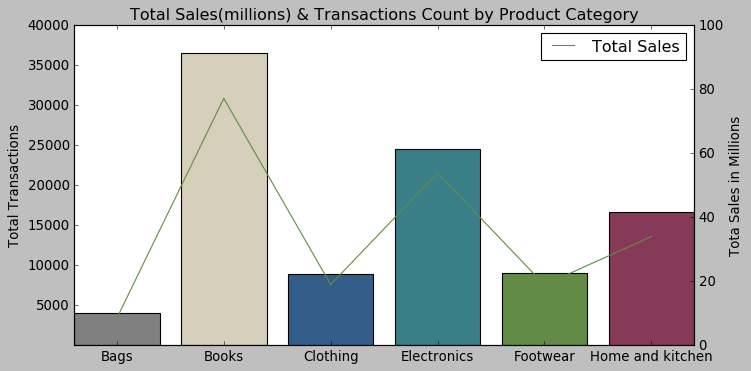

In [101]:
fig ,ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.bar(df_pc_m2.index,df_pc_m2['transaction_id'],
       color=['gray','#d6cfba','#345e8a','#3a7f87', '#628c46','#873a58','#d9a5b9'],alpha=1)
ax2.plot(x_s_m.index,x_s_m,color ='#628c46',label ='Total Sales')
ax1.set_ylim(1,40000)
ax2.set_ylim(0,100)
plt.style.use('classic')
ax1.set_title('Total Sales(millions) & Transactions Count by Product Category')
ax2.legend(markerscale=2)
ax1.set_ylabel('Total Transactions')
ax2.set_ylabel('Tota Sales in Millions')
plt.xlabel('Product Category')
plt.show()

In [102]:
df_pc =df_merged3.groupby('prod_subcat').count()

In [103]:
plt_df =df_pc.loc[df_pc.index,'transaction_id',]

In [104]:
nl_pro = plt_df.nlargest(10)

In [105]:
plt_df

prod_subcat
Academic                2029
Audio and video         2993
Bath                    2058
Cameras                  985
Children                2058
Comics                  3067
Computers                958
DIY                      989
Fiction                 1043
Furnishing              1007
Kids                    7069
Kitchen                 2993
Mens                    9902
Mobiles                 4002
Non-Fiction             2993
Personal Appliances      972
Tools                   2029
Women                  10019
Name: transaction_id, dtype: int64

In [106]:
nl_pro

prod_subcat
Women              10019
Mens                9902
Kids                7069
Mobiles             4002
Comics              3067
Audio and video     2993
Kitchen             2993
Non-Fiction         2993
Bath                2058
Children            2058
Name: transaction_id, dtype: int64

In [107]:
############################################
df_merged3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month,Year,Day,Weekend/Weekday
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women,2014-02-28,2,2014,Friday,Weekend
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women,2014-02-20,2,2014,Thursday,Weekday
4,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Mens,2014-02-20,2,2014,Thursday,Weekday


In [108]:
df_merged3['prod_subcat'].value_counts()

Women                  10019
Mens                    9902
Kids                    7069
Mobiles                 4002
Comics                  3067
Non-Fiction             2993
Kitchen                 2993
Audio and video         2993
Bath                    2058
Children                2058
Academic                2029
Tools                   2029
Fiction                 1043
Furnishing              1007
DIY                      989
Cameras                  985
Personal Appliances      972
Computers                958
Name: prod_subcat, dtype: int64

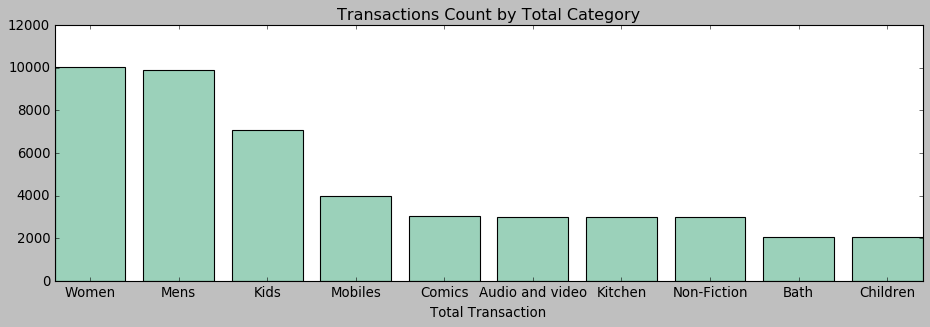

In [109]:
xbar = nl_pro.index
ybar =nl_pro.values
fig, ax = plt.subplots(figsize=(14,4))
plt.style.use('classic')
plt.title('Transactions Count by Total Category')
plt.xlabel('Total Transaction')
ax.bar(xbar,ybar,color='#9bd1ba')

plt.show()


In [110]:
plt_df

prod_subcat
Academic                2029
Audio and video         2993
Bath                    2058
Cameras                  985
Children                2058
Comics                  3067
Computers                958
DIY                      989
Fiction                 1043
Furnishing              1007
Kids                    7069
Kitchen                 2993
Mens                    9902
Mobiles                 4002
Non-Fiction             2993
Personal Appliances      972
Tools                   2029
Women                  10019
Name: transaction_id, dtype: int64

In [111]:
x_plot = x_y.value_counts(sort=True)

In [112]:
x_mdf = pd.DataFrame(x_m)

In [113]:
df_merged3.dtypes

transaction_id                int64
cust_id                       int64
tran_date                    object
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_subcat                  object
Date_fm              datetime64[ns]
Month                         int64
Year                          int64
Day                          object
Weekend/Weekday              object
dtype: object

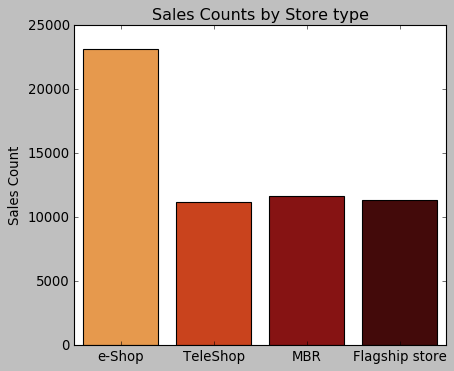

In [114]:
fig, ax = plt.subplots(figsize=(6,5))
ax =sns.countplot(df_merged3['Store_type'],palette='gist_heat_r')
ax.set_title('Sales Counts by Store type')
ax.set_ylabel('Sales Count')
ax.set_xlabel('')
plt.show()

In [115]:
# we can compare what type of store provide more sales, and and which of them have lowest sale.

In [116]:
#checking whcih of the transactions are negative, negative signifies resturn this
#feature can help us understand what type of products are being reurned
list_qty = df_merged3['Qty']
return_or_sale =[]
for i in list_qty:
    if i< 0:
        return_or_sale.append('Return')
    else:
        return_or_sale.append('Sale')

In [117]:
df_merged3['Return/Sale']=return_or_sale

In [118]:
df_sale_trs = df_merged3[df_merged3['Return/Sale']=='Sale']

In [119]:
df_return_trs = df_merged3[df_merged3['Return/Sale']=='Return']

In [120]:
ls_ret=df_return_trs['prod_subcat'].value_counts()

In [121]:
ls_sale = df_sale_trs['prod_subcat'].value_counts()

In [122]:
#df_return_trs = df_merged3[df_merged3['Return/Sale']=='Return']

In [123]:
print(ls_ret)
print(ls_sale)

Mens                   973
Women                  971
Kids                   674
Mobiles                379
Comics                 295
Non-Fiction            268
Kitchen                268
Audio and video        268
Children               201
Bath                   201
Tools                  195
Academic               195
Fiction                103
Furnishing             101
Cameras                 87
Personal Appliances     85
DIY                     84
Computers               82
Name: prod_subcat, dtype: int64
Women                  9048
Mens                   8929
Kids                   6395
Mobiles                3623
Comics                 2772
Non-Fiction            2725
Kitchen                2725
Audio and video        2725
Bath                   1857
Children               1857
Academic               1834
Tools                  1834
Fiction                 940
Furnishing              906
DIY                     905
Cameras                 898
Personal Appliances     887
Comput

In [124]:
df_merged3.head(4)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_subcat,Date_fm,Month,Year,Day,Weekend/Weekday,Return/Sale
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Women,2014-02-28,2,2014,Friday,Weekend,Return
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend,Return
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Mens,2014-02-28,2,2014,Friday,Weekend,Return
3,17183929085,266863,20-02-2014,1,2,1,1359,142.695,1501.695,TeleShop,Women,2014-02-20,2,2014,Thursday,Weekday,Sale


In [125]:
rng = len(ls_sale)
rng

18

In [126]:
#Ratio of return to sale
ls_ratio =[]
rng = len(ls_ret)
for i in range(rng):
    rt = (ls_ret[i]/ls_sale[i])*100
    ls_ratio.append(rt)

In [127]:
df_sr_ratio =pd.DataFrame(ls_sale)
df_sr_ratio['Return_to_Sales_Ratio']=ls_ratio

In [128]:
df_sr_ratio

,prod_subcat,Return_to_Sales_Ratio
Women,9048,10.753758
Mens,8929,10.874678
Kids,6395,10.539484
Mobiles,3623,10.460944
Comics,2772,10.642136
Non-Fiction,2725,9.834862
Kitchen,2725,9.834862
Audio and video,2725,9.834862
Bath,1857,10.823910
Children,1857,10.823910


In [129]:
# This Ratio of count of  return(-Ve transaction) to count of sales,
#gives us idea about what kind of products have tendency to be returned
#more after purchase. lower the ratio is higher is the tendency of it to be retured back by customer.


Text(0, 0.5, 'Return to Sales Ratio')

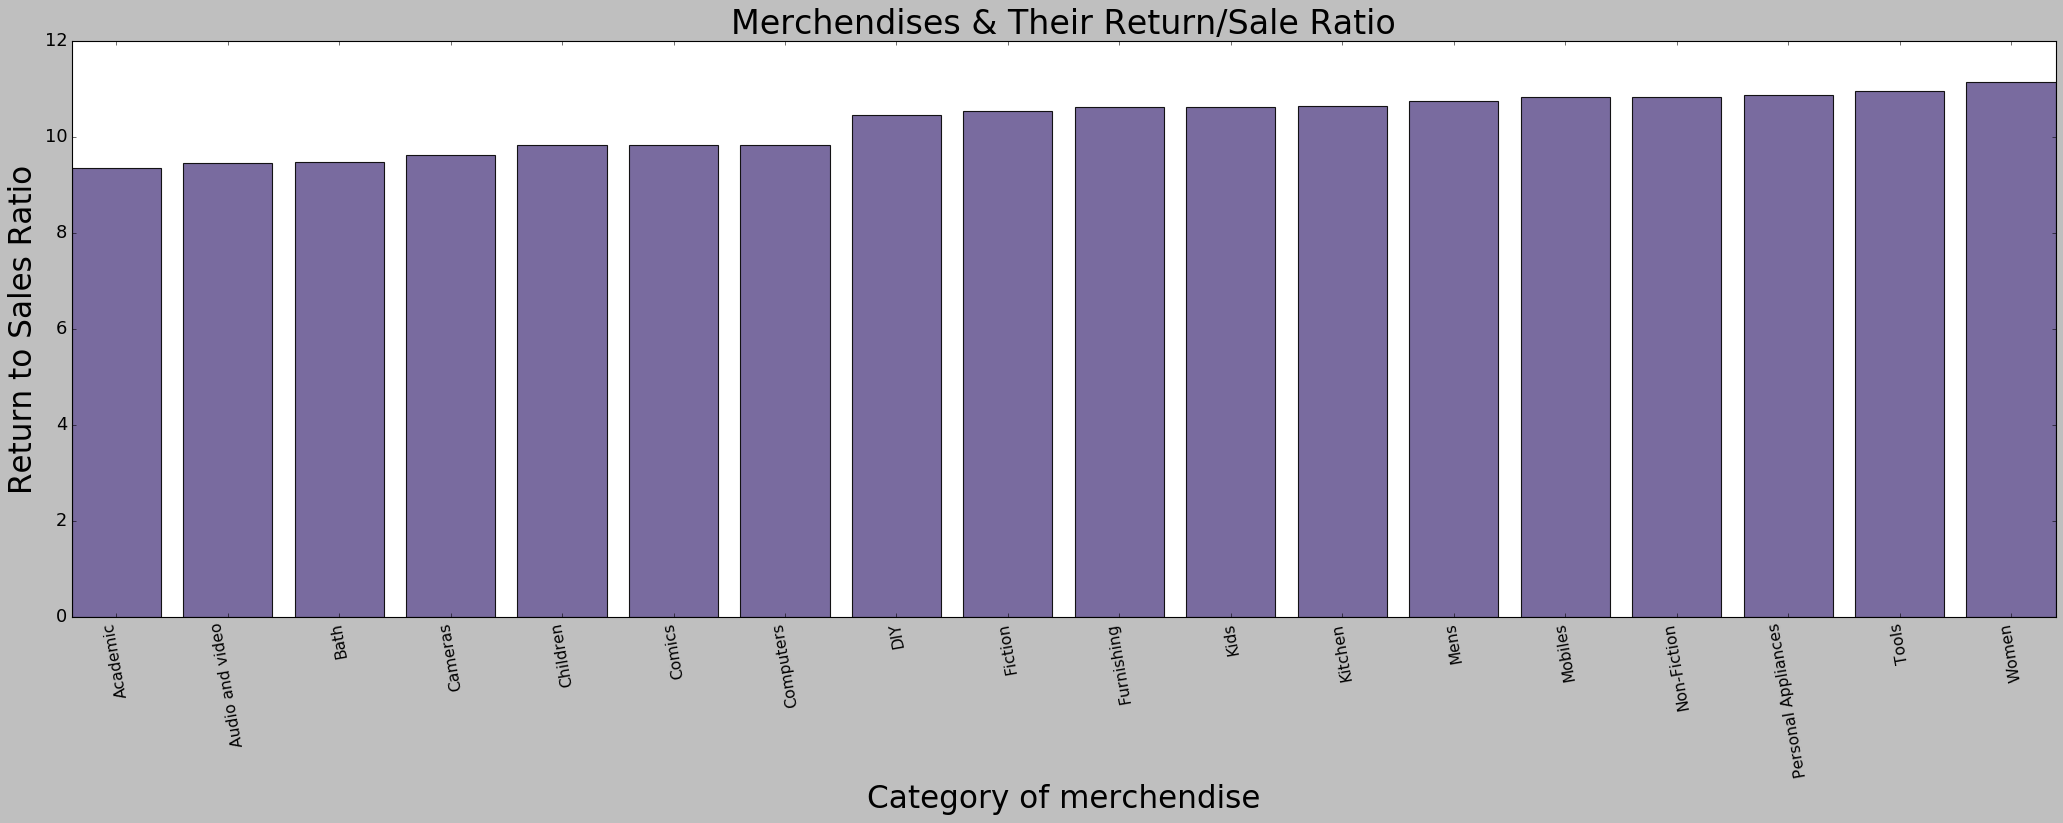

In [130]:
xbar = df_sr_ratio.index
ybar =df_sr_ratio['Return_to_Sales_Ratio']
#plt.figure(figsize=(32,8))
fig = plt.figure(figsize=(32,9))
plt.bar(sorted(xbar),sorted(ybar),color ='#6b5b95',alpha =0.9)

plt.xticks(fontsize=14,rotation =100)
plt.yticks(fontsize=16)
plt.title('Merchendises & Their Return/Sale Ratio',fontsize=30)
plt.xlabel('Category of merchendise',fontsize=28)
plt.ylabel('Return to Sales Ratio',fontsize=28)


In [131]:
x2 =df_merged_final['prod_sub_cat_code'].unique()
x2

array([ 1.,  3.,  8.,  6.,  5., 12., 11.,  7.,  4., 10.,  2.,  9.])

In [132]:
x2.sort()


In [133]:
x2

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [134]:
df_merged_final.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,8.071219e+10,270351,28-02-2014,1.0,1.0,-5.0,-772.0,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,8.071219e+10,270351,20-02-2014,1.0,1.0,5.0,772.0,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,3.695744e+10,270351,16-09-2013,3.0,2.0,3.0,361.0,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,1.223628e+10,270351,18-03-2013,8.0,3.0,3.0,1030.0,324.450,3414.450,e-Shop,26-09-1981,M,5.0
4,1.318156e+10,270351,13-12-2011,6.0,5.0,1.0,1048.0,110.040,1158.040,e-Shop,26-09-1981,M,5.0


In [135]:
#Number of male and female buyers are almost equal with male being on slightly hiher side

In [136]:
df_merged_final['Gender'].value_counts()

M    11805
F    11231
Name: Gender, dtype: int64

In [137]:
# Histogram below shows that city code 11,12 and 4 have highest number of transaction , therefore most of our target customer
#lives in these two city.

In [138]:
#From the final data set that include customer details can be used to know more about customer to serve them better.
#As the gender of customer is almost on equal side with male being very slightly higher in count.
#From the Date of birth of customer age can be extracted to check what is the age distribution of customers.

In [139]:
dob_cus = df_merged_final['DOB']


In [140]:
dob_cus

0        26-09-1981
1        26-09-1981
2        26-09-1981
3        26-09-1981
4        26-09-1981
            ...    
23048    10-06-1972
23049    17-07-1975
23050    27-12-1972
23051    09-09-1977
23052    21-01-1984
Name: DOB, Length: 23036, dtype: object

In [141]:
df_merged_final.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,8.071219e+10,270351,28-02-2014,1.0,1.0,-5.0,-772.0,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,8.071219e+10,270351,20-02-2014,1.0,1.0,5.0,772.0,405.300,4265.300,e-Shop,26-09-1981,M,5.0
2,3.695744e+10,270351,16-09-2013,3.0,2.0,3.0,361.0,113.715,1196.715,Flagship store,26-09-1981,M,5.0
3,1.223628e+10,270351,18-03-2013,8.0,3.0,3.0,1030.0,324.450,3414.450,e-Shop,26-09-1981,M,5.0
4,1.318156e+10,270351,13-12-2011,6.0,5.0,1.0,1048.0,110.040,1158.040,e-Shop,26-09-1981,M,5.0


In [142]:
df_mfage = df_merged_final


In [143]:
df_mfage['DOB']

0        26-09-1981
1        26-09-1981
2        26-09-1981
3        26-09-1981
4        26-09-1981
            ...    
23048    10-06-1972
23049    17-07-1975
23050    27-12-1972
23051    09-09-1977
23052    21-01-1984
Name: DOB, Length: 23036, dtype: object

In [144]:
#df_mfage['DOB'] = pd.to_datetime(df_mfage['DOB'],format ='%d-%m-%y') 

In [145]:
 df_mfage['DOB_age'] = df_mfage['DOB'].apply(lambda x:datetime.strptime(x,'%d-%m-%Y'))

In [146]:
df_mfage['DOB_age'].dt.year

0        1981
1        1981
2        1981
3        1981
4        1981
         ... 
23048    1972
23049    1975
23050    1972
23051    1977
23052    1984
Name: DOB_age, Length: 23036, dtype: int64

In [147]:
df_mfage['Customer_age'] =2013- df_mfage['DOB_age'].dt.year 

In [148]:
df_mfage

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,DOB_age,Customer_age
0,8.071219e+10,270351,28-02-2014,1.0,1.0,-5.0,-772.0,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,1981-09-26,32
1,8.071219e+10,270351,20-02-2014,1.0,1.0,5.0,772.0,405.300,4265.300,e-Shop,26-09-1981,M,5.0,1981-09-26,32
2,3.695744e+10,270351,16-09-2013,3.0,2.0,3.0,361.0,113.715,1196.715,Flagship store,26-09-1981,M,5.0,1981-09-26,32
3,1.223628e+10,270351,18-03-2013,8.0,3.0,3.0,1030.0,324.450,3414.450,e-Shop,26-09-1981,M,5.0,1981-09-26,32
4,1.318156e+10,270351,13-12-2011,6.0,5.0,1.0,1048.0,110.040,1158.040,e-Shop,26-09-1981,M,5.0,1981-09-26,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,1.629319e+10,274931,31-01-2011,8.0,3.0,3.0,137.0,43.155,454.155,Flagship store,10-06-1972,M,10.0,1972-06-10,41
23049,7.016396e+10,267902,30-01-2011,10.0,5.0,4.0,404.0,169.680,1785.680,e-Shop,17-07-1975,M,4.0,1975-07-17,38
23050,2.041714e+10,269556,29-01-2011,10.0,6.0,3.0,654.0,206.010,2168.010,Flagship store,27-12-1972,M,5.0,1972-12-27,41
23051,5.853141e+10,274935,29-01-2011,10.0,5.0,4.0,104.0,43.680,459.680,Flagship store,09-09-1977,F,3.0,1977-09-09,36


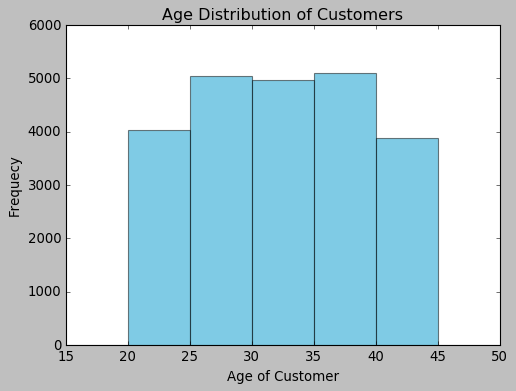

In [149]:
fig,ax = plt.subplots(figsize = (7,5))
ax.hist(df_mfage['Customer_age'],bins =[15,20,25,30,35,40,45,50],histtype='bar',color ='#0099cc',alpha =0.5)
ax.set_title('Age Distribution of Customers')
ax.set_ylabel('Frequecy')
ax.set_xlabel('Age of Customer')
plt.show()

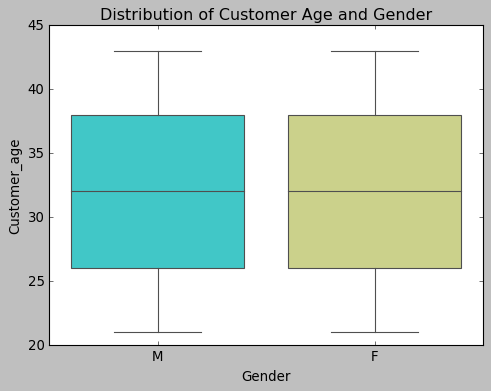

In [150]:
x_b =df_mfage['Gender']
y_b =df_mfage['Customer_age']
fig , ax = plt.subplots(figsize=(7,5))
ax.set_title('Distribution of Customer Age and Gender')
ax = sns.boxplot(x_b,y_b,palette='rainbow')

In [151]:
#df_mfage['DOB_date'] = df_mfag.apply(lambda x : )

In [152]:
city_codes =df_mfage['city_code'].value_counts()


In [153]:
 x_city =city_codes.index

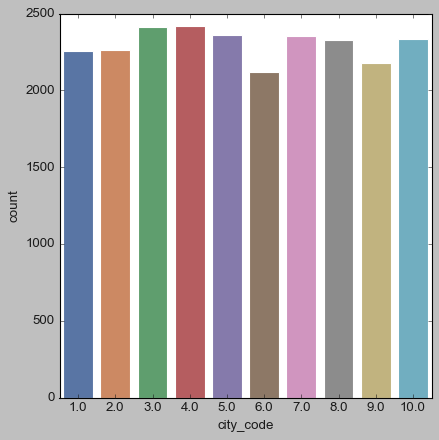

In [154]:
fig,ax =plt.subplots(figsize=(6,6))
sns.set(style='darkgrid')
ax = sns.countplot(df_mfage['city_code'])